Precompute separate log signatures for each of the highlited brain regions:

<img src="../images/brain_regions.png" style="width: 200px;"/>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from signature_transform_utils import modify_metadata, preprocess_for_logsig, calculate_logsignature_for_metadata

In [2]:
TRAIN_EEG_DIR = "../../data/train_eegs/"
TRAIN_METADATA_DIR = "../../data/train.csv"
TRAIN_SIGNATURES_DIR = "../../data/train_signatures/"

In [3]:
train_metadata = pd.read_csv(TRAIN_METADATA_DIR)
train_metadata = modify_metadata(train_metadata)

In [4]:
train_metadata

,eeg_id,spectrogram_id,eeg_offset_seconds,spec_offset_seconds,patient_id,target,seizure_vote,lpd_vote,gpd_vote,lrda_vote,grda_vote,other_vote
0,568657,789577333,9.0,9.0,20654,Other,0.0,0.000000,0.25,0.000000,0.166667,0.583333
1,582999,1552638400,18.0,18.0,20230,LPD,0.0,0.857143,0.00,0.071429,0.000000,0.071429
2,642382,14960202,12.0,1020.0,5955,Other,0.0,0.000000,0.00,0.000000,0.000000,1.000000
3,751790,618728447,0.0,908.0,38549,GPD,0.0,0.000000,1.00,0.000000,0.000000,0.000000
4,778705,52296320,0.0,0.0,40955,Other,0.0,0.000000,0.00,0.000000,0.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
17084,4293354003,1188113564,0.0,0.0,16610,GRDA,0.0,0.000000,0.00,0.000000,0.500000,0.500000
17085,4293843368,1549502620,0.0,0.0,15065,GRDA,0.0,0.000000,0.00,0.000000,0.500000,0.500000
17086,4294455489,2105480289,0.0,0.0,56,Other,0.0,0.000000,0.00,0.000000,0.000000,1.000000
17087,4294858825,657299228,6.0,6.0,4312,Other,0.0,0.000000,0.00,0.000000,0.066667,0.933333


In [5]:
preprocessed = preprocess_for_logsig(train_metadata.head(10), TRAIN_EEG_DIR)

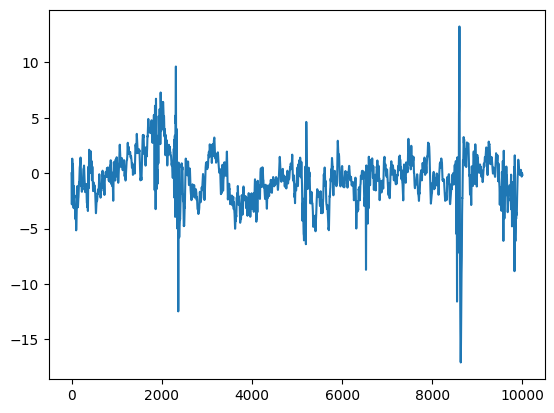

In [6]:
# example of a preprocessed eeg signal
plt.plot(preprocessed[0,:,1])

In [7]:
batch_size = 100

In [ ]:
calculate_logsignature_for_metadata(train_metadata, TRAIN_EEG_DIR, TRAIN_SIGNATURES_DIR, batch_size)

In [8]:
# read and combine into one tensor
for i in range(0, len(train_metadata), batch_size):
    logsigs = np.load(f"{TRAIN_SIGNATURES_DIR}logsigs_lvl_5_{i}.npy")
    if i == 0:
        all_logsigs = logsigs
    else:
        all_logsigs = np.concatenate([all_logsigs, logsigs], axis=0)

In [9]:
# print quantiles
for q in [0.01, 0.05, 0.1, 0.5, 0.9, 0.95, 0.99]:
    print(f"Quantile {q}: {np.quantile(all_logsigs, q)}")

Quantile 0.01: -178761.11022895642
Quantile 0.05: -1418.3801895905085
Quantile 0.1: -150.09643235738736
Quantile 0.5: 0.04254851107794163
Quantile 0.9: 178.9159741128557
Quantile 0.95: 1624.422954307504
Quantile 0.99: 188404.3161554994


(array([5.7103100e+05, 4.7770000e+03, 4.8020000e+03, 4.7710000e+03,
        5.0150000e+03, 5.1550000e+03, 5.3410000e+03, 5.5040000e+03,
        5.6030000e+03, 5.9000000e+03, 6.1060000e+03, 6.3940000e+03,
        6.4660000e+03, 6.7690000e+03, 7.0920000e+03, 7.3790000e+03,
        7.6630000e+03, 7.9060000e+03, 8.2270000e+03, 8.6380000e+03,
        8.9260000e+03, 9.2470000e+03, 9.9670000e+03, 1.0401000e+04,
        1.0997000e+04, 1.1604000e+04, 1.2195000e+04, 1.3236000e+04,
        1.3593000e+04, 1.4740000e+04, 1.5605000e+04, 1.6855000e+04,
        1.8330000e+04, 1.9920000e+04, 2.1668000e+04, 2.3475000e+04,
        2.6255000e+04, 2.9375000e+04, 3.2744000e+04, 3.7721000e+04,
        4.3066000e+04, 5.1654000e+04, 6.2313000e+04, 7.8781000e+04,
        1.0415400e+05, 1.4986100e+05, 2.4655100e+05, 5.8352600e+05,
        5.1137071e+07, 1.1636810e+06, 3.3604200e+05, 1.8365700e+05,
        1.2253000e+05, 9.0772000e+04, 7.0706000e+04, 5.7891000e+04,
        4.8004000e+04, 4.1133000e+04, 3.6016000e

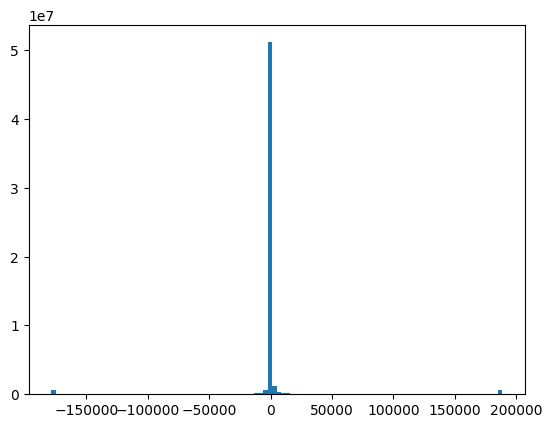

In [10]:
# clearly, there are many outliers in the signature terms
plt.hist(np.clip(all_logsigs.flatten(), -178761, 188404), bins=100)

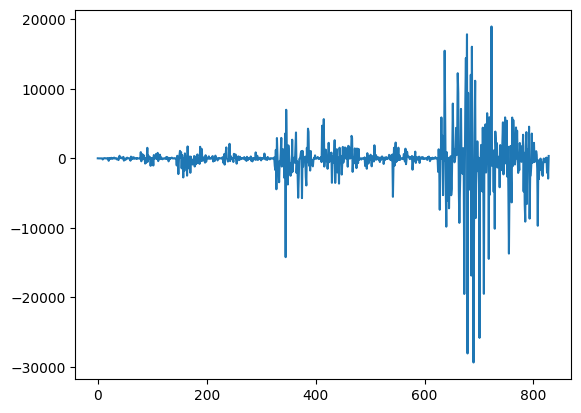

In [11]:
# in particular, the last terms seem to become very large
plt.plot(all_logsigs[0,2,:])

In [12]:
np.save(f"{TRAIN_SIGNATURES_DIR}logsigs_lvl_5.npy", all_logsigs)